In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

In [2]:
df = pd.read_csv("cancer_reg.csv", encoding="ISO-8859-1")

In [3]:
df.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,...,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,...,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,...,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,...,NaN,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [6]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,15))
# sns.heatmap(df.corr(),annot=True)
# plt.show()

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
target_corr = corr_matrix["TARGET_deathRate"].sort_values(ascending=False)
correlation_table = target_corr.to_frame().reset_index()
correlation_table.columns = ["Feature", "Correlation with Target"]

print("\nTable: Correlation of Features with Target Variable")
print(correlation_table)



Table: Correlation of Features with Target Variable
                    Feature  Correlation with Target
0          TARGET_deathRate                 1.000000
1    PctPublicCoverageAlone                 0.388474
2              PctHS25_Over                 0.379753
3             incidenceRate                 0.376033
4            povertyPercent                 0.366102
5         PctPublicCoverage                 0.346525
6      PctUnemployed16_Over                 0.319756
7                  PctBlack                 0.258829
8                PctHS18_24                 0.254029
9              PctNoHS18_24                 0.078894
10          MedianAgeFemale                 0.019737
11                MedianAge                -0.011419
12            MedianAgeMale                -0.026774
13              studyPerCap                -0.033589
14                BirthRate                -0.051311
15         AvgHouseholdSize                -0.062568
16         avgDeathsPerYear                -0.

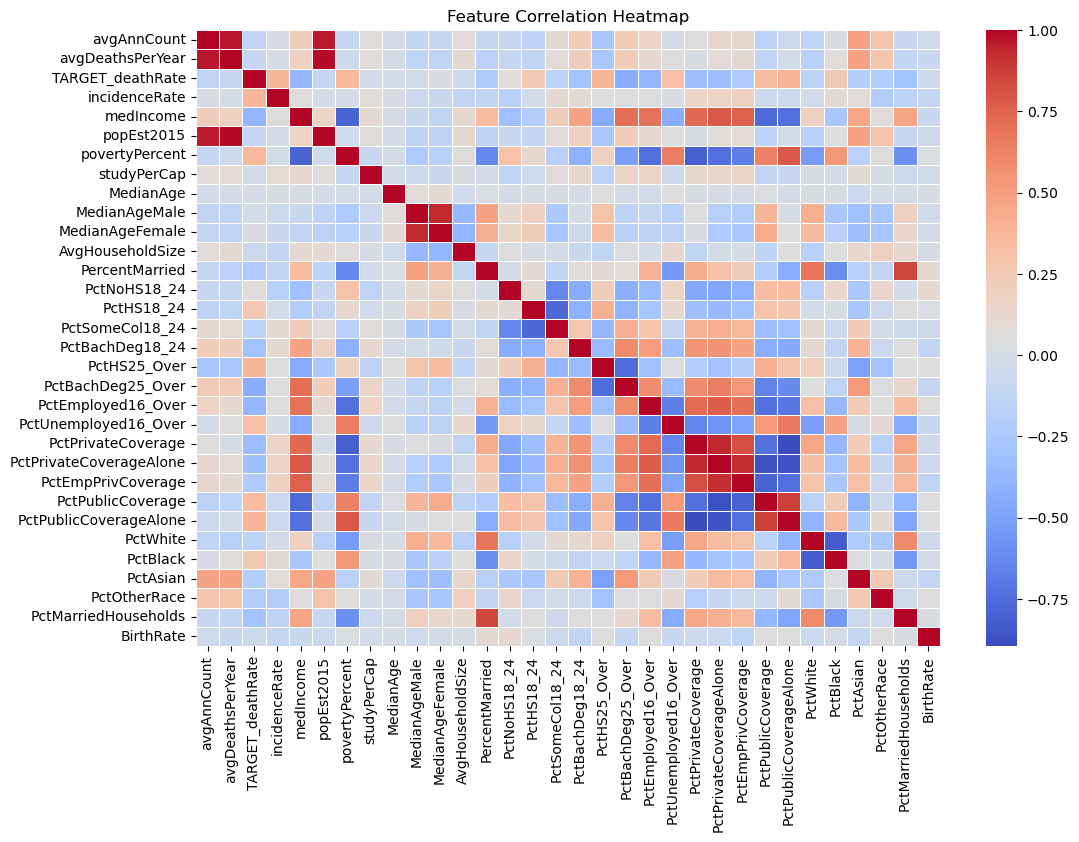

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
low_corr_features = correlation_table[abs(correlation_table["Correlation with Target"]) < 0.1]["Feature"].tolist()

high_corr_features = set()
for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if col != index and abs(corr_matrix.loc[col, index]) > 0.85:
            high_corr_features.add(index)

print("\nFeatures to Drop (Low Correlation with Target):", low_corr_features)
print("\nFeatures to Drop (High Intercorrelation):", list(high_corr_features))


NameError: name 'correlation_table' is not defined

In [10]:
df = df.select_dtypes(include=[np.number])

In [11]:
X = df.drop(columns=["TARGET_deathRate"])  
y = df["TARGET_deathRate"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
    "SVR": SVR(kernel="rbf"),
    "XGBoost": xgb.XGBRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, r2, rmse, mae])

table1 = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE", "MAE"])
print("\nTable 1: Model Performance Without Scaling")
print(table1)


Table 1: Model Performance Without Scaling
               Model  R2 Score       RMSE        MAE
0  Linear Regression  0.229908  23.368392  16.070153
1      Decision Tree -0.105573  27.999561  19.319552
2      Random Forest  0.233622  23.311975  16.540632
3                SVR  0.020026  26.361175  20.101906
4            XGBoost  0.141197  24.677681  17.723580
5  Gradient Boosting  0.174831  24.189617  16.699162


In [18]:
X_train.shape,y_test.shape

((472, 31), (119,))

In [20]:
y_train.shape,y_test.shape

((472,), (119,))

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
predictions=lr.predict(X_test)
predictions

array([204.47756496, 144.42388548, 136.7406017 , 193.05623351,
       154.19949406, 186.0643084 , 201.7702317 , 182.48832521,
       160.41639728, 172.42329946, 143.97039752, 167.09305854,
       192.30939635, 176.91366116, 174.21239387, 165.43393524,
       182.23432736, 167.20388886, 156.82423907, 163.69715994,
       177.25826704, 190.12534924, 165.00034404, 171.04266968,
       187.49378726, 101.7618568 , 169.28884035, 172.40437585,
       164.07647279, 188.95227387, 143.61930788, 179.33112376,
       193.9408777 , 143.70984674, 163.71619109, 202.44879293,
       153.42307751, 164.58899936, 194.90585051, 191.77687285,
       169.93868394, 180.34540198, 196.95596025, 171.31196758,
       167.86659951, 146.38383025, 170.02072677, 172.46783232,
       194.9371134 , 183.99091327, 187.14301555, 155.3834816 ,
       188.0091861 , 204.14712341, 156.8300721 , 173.0926678 ,
       179.79654471, 175.46400185, 175.84940907, 198.92328141,
       134.1884702 , 175.24855542, 218.20192874, 198.08

In [23]:
#without scaling
from sklearn import metrics
print("accuracy score:",metrics.r2_score(y_test,predictions))

accuracy score: 0.22990824648927222


In [24]:
#with scaling 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_scaled = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
    mae = mean_absolute_error(y_test, y_pred_scaled)

    results_scaled.append([name, r2, rmse, mae])

    print(f"{name} Accuracy Score:", metrics.r2_score(y_test, y_pred_scaled))

table2 = pd.DataFrame(results_scaled, columns=["Model", "R2 Score", "RMSE", "MAE"])
print("\nTable 2: Model Performance WITH Scaling")
print(table2)


Linear Regression Accuracy Score: 0.22990824648927766
Decision Tree Accuracy Score: -0.1063255123750737
Random Forest Accuracy Score: 0.23269037601735887
SVR Accuracy Score: 0.18722567698819403
XGBoost Accuracy Score: 0.14119709752426846
Gradient Boosting Accuracy Score: 0.17398176770194473

Table 2: Model Performance WITH Scaling
               Model  R2 Score       RMSE        MAE
0  Linear Regression  0.229908  23.368392  16.070153
1      Decision Tree -0.106326  28.009094  19.371408
2      Random Forest  0.232690  23.326142  16.560918
3                SVR  0.187226  24.007259  17.951054
4            XGBoost  0.141197  24.677681  17.723580
5  Gradient Boosting  0.173982  24.202064  16.722636


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print("Tuned Random Forest R2 Score:", r2_score(y_test, y_pred_rf) * 100)

Tuned Random Forest R2 Score: 23.143238760647165
